# Simple Neural Network

Simple Red Neuronal (Perceptrón) para la materia Tecnologías Exponenciales - TIC

Inspirado en https://github.com/jonasbostoen/simple-neural-network

### Librerias

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import tabulate
import networkx as nx
from random import random as rand
import itertools

ModuleNotFoundError: No module named 'numpy'

In [3]:
np.random.seed(1)

NameError: name 'np' is not defined

### Funciones

In [4]:
#DEFINIMOS NUESTRA RED COMO UNA DE TIPO SIGMOIDE
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x) )

# sigmoid = lambda x : 1 / ( 1 + np.exp(-x) )

def sigmoid_derivative(x):
    return x * (1 - x)

# sigmoid_derivative = lambda x : x * (1 - x)

#### Visualización Función Sigmoide

In [5]:
x = np.linspace(-5,5,100)
y = sigmoid(x)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.plot(x, y)
plt.locator_params(axis='y', nbins=3)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.grid()

NameError: name 'np' is not defined

## Setup

### Values

#### Training Values

In [ ]:
#GUARDAMOS EL DATASET EN LA VARIABLE netflixTitle Y LO MOSTRAMOS.
netflixTitle = pd.read_csv("netflix_titles.csv")
netflixTitle = netflixTitle.dropna()
netflixTitle.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [1]:
#CREAMOS Y MOSTRAMOS UNA NUEVA VARIABLE DONDE GUARDAMOS SOLO LOS DATOS QUE NOS SON UTILES DEL DATASET.
netflixTitleNew = netflixTitle[['type', 'director', 'cast', 'date_added', 'listed_in', 'description']]
netflixTitleNew

NameError: name 'netflixTitle' is not defined

In [ ]:
netflixTitleNew

,type,director,cast,date_added,listed_in,description
7,Movie,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","September 24, 2021","Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,TV Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...","September 24, 2021","British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,Movie,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...","September 24, 2021","Comedies, Dramas",A woman adjusting to life after a loss contend...
12,Movie,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","September 23, 2021","Dramas, International Movies",After most of her family is murdered in a terr...
24,Movie,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...","September 21, 2021","Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...
8801,Movie,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","March 9, 2016","Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,Movie,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...","November 20, 2019","Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,Movie,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...","November 1, 2019","Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Movie,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...","January 11, 2020","Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
# SACAMOS LAS PARTES DONDE 'date_added' NO ES IGUAL A "PG".
netflixTitle : pd.DataFrame= netflixTitle[netflixTitle["date_added"] != "PG"]

In [2]:
#CREAMOS UNA VARIABLE DONDE GUARDAREMOS LOS DATOS DE ENTRADA DESTINADOS A TRAINING.
training_inputs: pd.DataFrame = netflixTitle.drop(['listed_in', 'show_id', 'country', 'rating', 'duration'], axis=1)
#CREAMOS OTRA VARIABLE DONDE GUARDAMOS LOS DATOS DE SALIDA, ESTA SERA LA VARIABLE A PREDECIR EN ESTE MODELO.
training_outputs: pd.Series = netflixTitleNew.listed_in
display(training_inputs)
display(training_outputs)

NameError: name 'netflixTitle' is not defined

In [ ]:
#CREAMOS UNA FUNCION LLAMADA SNNModel, ESTA MISMA CONFORMA A NUESTRA RED NEURONAL SIGMOIDE.
SNNModel = lambda x, w: sigmoid(np.dot(x, w))

In [ ]:
#ORDENAMOS LOS DATOS
netflixTitle['listed_in']: pd.DataFrame = netflixTitle['listed_in'].astype(str)
netflixTitle['listed_in']: pd.DataFrame = netflixTitle['listed_in'].str.replace(' ', '')
netflixTitle['listed_in'] : pd.DataFrame= netflixTitle['listed_in'].str.split(',')

In [ ]:
#HACEMOS UNA LISTA PARA GUARDAR LOS GENEROS DE CADA PELICULA.
MovieGender:list = []
for genre1 in netflixTitle['listed_in']:

    for genre in genre1:
        if genre != 'None' and genre not in MovieGender:
            MovieGender.append(genre)
#SI LA CASILLA DICE 'None' O ESTA REPETIDO EN LA LISTA NO SE AGREGA.

In [ ]:
for genre in MovieGender:
    netflixTitle[genre] = netflixTitle['listed_in'].apply(lambda x: 1 if genre in x else 0)

netflixTitle.drop('listed_in', axis=1, inplace=True)
#CREAMOS COLUMNAS INDIVIDUALES PARA LOS GENEROS Y SI PERTENECE AL GENERO SE PONE 1 SI NO 0.

display(netflixTitle)

In [ ]:
matrizGeneros: pd.DataFrame = netflixTitle.drop(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'description'], axis=1)
matrizGeneros

In [ ]:
#ALMACENAMOS EN 'N' EL NUMERO DE COLUMNAS DEL DATAFRAME 'training_inputs'
#CONFIGURACIÓN DE LA RED: EN NUESTRO MODELO, 'N' REPRESENTA LA CANTIDAD DE ENTRADAS (6), 'M' LA CANTIDAD DE SALIDAS (21), Y 'SYNAPTIC_WEIGHTS' DENOTA LOS PESOS ASOCIADOS A CADA UNA DE LAS ENTRADAS (21 PESOS POR CADA 'N').
n :int = training_inputs.shape[1]
#HACEMOS LO MISMO DE ANTES PERO AHORA CON EL DATAFRAME 'matrizGeneros' Y LO GUARDAMOS EN 'M'
m :int = matrizGeneros.shape[1]
#TERMINAMOS HACIENDO UNA NUEVA MATRIZ CON PESOS RANDOM Y DIMENSIONES (N, M)
synaptic_weights = 2 + np.random.random((n, m)) - 1
synaptic_weights: pd.DataFrame = synaptic_weights.astype(float)
synaptic_weights.shape
synaptic_weights

(7, 42)

In [ ]:
training_inputs

,type,title,director,cast,date_added,release_year,description
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","September 24, 2021",1993,"On a photo shoot in Ghana, an American model s..."
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...","September 24, 2021",2021,A talented batch of amateur bakers face off in...
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...","September 24, 2021",2021,A woman adjusting to life after a loss contend...
12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","September 23, 2021",2021,After most of her family is murdered in a terr...
24,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...","September 21, 2021",1998,When the father of the man she loves insists t...
...,...,...,...,...,...,...,...
8801,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","March 9, 2016",2015,Recovering alcoholic Talal wakes up inside a s...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...","November 20, 2019",2007,"A political cartoonist, a crime reporter and a..."
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...","November 1, 2019",2009,Looking to survive in a world taken over by zo...
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...","January 11, 2020",2006,"Dragged from civilian life, a former superhero..."


In [ ]:
# GENERAMOS UNA NUEVA COLUMNA PARA GUARDAR LA DURACIÓN DE LA PELÍCULA EXCLUYENDO EL TEXTO 'MIN'.
training_inputs["runtime_alt"] = training_inputs.Runtime.str.split( 'min').apply(lambda x: x[0])
# BORAMOS LA COLUMNA 'RUNTIME'.
training_inputs=training_inputs.drop(['Runtime'], 1)

In [ ]:
# DAMOS VALOR 0 A LOS ESPACIOS VACÍOS EN LA COLUMNA 'GROSS' Y ELIMINAMOS LAS COMAS.
training_inputs["Gross"]: pd.DataFrame = training_inputs["Gross"].fillna(0).str.replace(",", "")

In [ ]:
# TRANSFORMAMOS LAS COLUMNAS DE 'TRAINING_INPUTS' A TIPO FLOAT.
training_inputs: pd.DataFrame = training_inputs.astype(float)

In [ ]:
#CAMBIAMOS LOS VALORES NAN DE LAS COLUMNAS 'GROSS' Y 'META_SCORE' A 0.
training_inputs['Gross']=training_inputs['Gross'].fillna(0)
training_inputs['Meta_score']=training_inputs['Meta_score'].fillna(0)

In [ ]:
print('Synaptic weights after training')
print(synaptic_weights)

print('Outputs after training: ')
print(outputs)

In [ ]:
large = lambda x : display(HTML('<p style="font-size: 50px; color: #66D148">'+str(x)+'</p>'))

In [ ]:
input_layer

In [ ]:
training_inputs = np.array([
    [0,0,1],
    [1,1,1],
    [1,0,1],
    [0,1,1]
])

training_outputs = np.array([[0,1,1,0]]).T

display(training_inputs)
display(training_outputs)

array([[0, 0, 1],
       [1, 1, 1],
       [1, 0, 1],
       [0, 1, 1]])

array([[0],
       [1],
       [1],
       [0]])

In [ ]:
training_values = np.concatenate((training_inputs.T, training_outputs.T)).T
table = lambda arr : display(HTML(tabulate.tabulate(arr, tablefmt='html')))
table(training_values)

0,0,1,0
1,1,1,1
1,0,1,1
0,1,1,0


#### Synaptic weights

In [ ]:
n = training_inputs.shape[1]
synaptic_weights = 2 + np.random.random((3, 1)) - 1

synaptic_weights

array([[1.417022  ],
       [1.72032449],
       [1.00011437]])

## Training

Para obtener un resultado a partir de los inputs y los synaptic weights se realiza la siguiente función:

$$\sum_{i=0}^{n}{x_iw_i}$$

Y se le aplica la función sigmoide para normalizar al rango 0, 1

Por ejemplo, si nuestros inputs $x_i$ son `[1, 1, 1]` y nuestros pesos sinapticos $w_i$ son `[[11.30926442], [-0.20511667], [-5.4500033]]`

Nos resulta la cuenta
$$[1 \times 11.30926442] + [1 \times (-0.20511667)] + [1 \times (-5.4500033)] = 5.6541444499999995$$

Con la función sigmoide es facil ver como $$\operatorname{sigmoid}(5.65) \approx 1$$

In [ ]:
eval_NN = lambda x, w: sigmoid(np.dot(x, w))

In [ ]:
# 50000 epochs
for iteration in range(50000):

    # Arranca con los valores de training. Es nuestra layer/capa de entrada donde llegan los datos con los que predeciremos
    input_layer = training_inputs
    # Genera un output haciendo la suma de los valores de input multiplicados por su peso sinaptico, y aplicandole la función sigmoide para normalizar a -1, 1
    outputs = eval_NN(input_layer, synaptic_weights)#(Forward propagation) Esta multiplicando las entradas por los pesos para llegar a los resultados (salidas)

    # Calculo el error
    error = generos_matriz - outputs

    # Ajusto los pesos en funcion al error y al resultado obtenido (Back propagation: como dijimos antes lo que está haciendo es correr la función "de atrás para adelante", ya que está ajustando los pesos en función de la diferencia entre las salidas)
    adjustments = error * sigmoid_derivative(outputs)
    synaptic_weights += np.dot(input_layer.T, adjustments)#Gradiente descendente: ajustamos los pesos para obtener el que menor error nos dara (óptimo local)

In [ ]:
print('Synaptic weights after training')
print(synaptic_weights)

print('Outputs after training: ')
print(outputs)

Synaptic weights after training
[[11.30928823]
 [-0.2049903 ]
 [-5.45009058]]
Outputs after training: 
[[0.00427758]
 [0.99650944]
 [0.99715456]
 [0.00348752]]


## Eval

In [ ]:
table(training_values)

0,0,1,0
1,1,1,1
1,0,1,1
0,1,1,0


In [ ]:
large = lambda x : display(HTML('<p style="font-size: 50px; color: #66D148">'+str(x)+'</p>'))

In [ ]:
a = 1 #@param {type:"integer"}
c = 1 #@param {type:"integer"}
b = 1 #@param {type:"integer"}

input_layer = np.array([a, b, c])
res = sigmoid(np.dot(input_layer, synaptic_weights))[0]
display(res)

thresh = 0.01
out = 0 if res < thresh else 1

large(out)

NameError: name 'np' is not defined

In [ ]:
input_layer

In [ ]:
a = 1 #@param {type:"integer"}
c = 1 #@param {type:"integer"}
b = 1 #@param {type:"integer"}
d = 1 #@param {type:"integer"}
e = 1 #@param {type:"integer"}
f = 1 #@param {type:"integer"}

input_layer = np.array([a, b, c, d, e, f])
res = sigmoid(np.dot(input_layer, synaptic_weights))[0]
display(res)

thresh = 0.01
out = 0 if res < thresh else 1

large(out)

### Graph

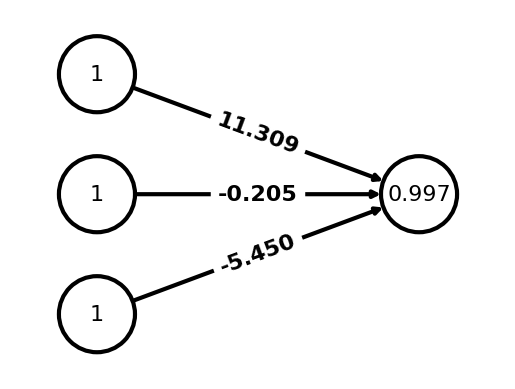

In [ ]:
G = nx.DiGraph()
layers = [[0, 1, 2], [3]]

rels = list(itertools.product(*layers))
#rels.append((3, 4))
flatten = lambda l: [x for i in l for x in i]

labels = {i: v for i, v in enumerate(input_layer)}
labels[3] = round(res, 3)
#labels[4] = 0 if res < thresh else 1

pos = {}
m = max([len(l) for l in layers])
for i, l in enumerate(layers):
  for j, v in enumerate(l):
    pos[v] = (i, len(l) - j)

pos[3] = (pos[3][0], pos[1][1])
#pos[4] = (pos[3][0] + 1, pos[1][1])

weights_labels = {(ra, rb): "{:0.3f}".format(synaptic_weights[i][0]) for i, (ra, rb) in enumerate(rels)}
G.add_edges_from(rels)

options = {
    "font_size": 16,
    "node_size": 3000,
    "node_color": [(1, 1, 1, 1) for _ in range(len(labels))],
    "edgecolors": "black",
    "linewidths": 3,
    "width": 3,
    "labels": labels,
    "connectionstyle": "arc3, rad=0",
}

nx.draw_networkx(G, pos, **options)

nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=weights_labels,
    font_color='black',
    font_size=16,
    font_weight='bold'
)

plt.axis('off')
ax = plt.gca()
ax.margins(0.20)
plt.show()